<a href="https://colab.research.google.com/github/dubba1212/AIML/blob/master/DAY_39(9_07_2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Handwritten digit recognition
####Data Colelction


Importing the required packages

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###Load the MNIST dataset

In [2]:
from keras.datasets.mnist import load_data

In [3]:
##load_data --- return value is two tuples train,test
(train_digits,train_labels),(test_digits,test_labels) = load_data()
print(train_digits.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)


In [4]:
test_digits.shape

(10000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
type(train_labels)

numpy.ndarray

In [8]:
import pandas as pd
pd.Series(train_labels).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [9]:
pd.Series(test_labels).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

Text(0.5, 1.0, 'Digit5')

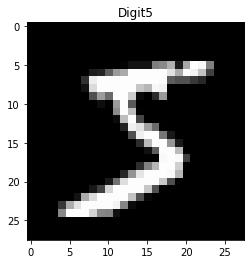

In [11]:
plt.imshow(train_digits[0],cmap='gray')
plt.title("Digit"+str(train_labels[0]))

<function matplotlib.pyplot.show>

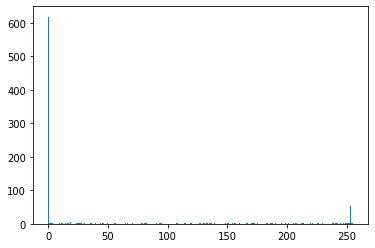

In [12]:
plt.hist(train_digits[0].flat,bins=255)
plt.show

(array([713.,  17.,   1.,   2.,  10.,   0.,   4.,   4.,   2.,  31.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

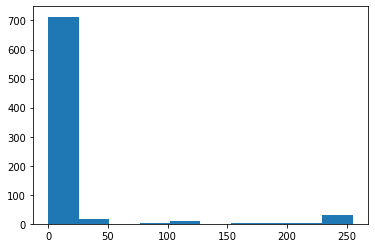

In [13]:
##Pixel distribution for digit 1
plt.hist(train_digits[14].flat)

In [15]:
train_labels[10:20]

array([3, 5, 3, 6, 1, 7, 2, 8, 6, 9], dtype=uint8)

In [16]:
samples = np.random.randint(train_digits.shape[0],size=16)
samples

array([24776, 41805,  7382, 47673, 57292,  3501, 38903, 54157, 10763,
       53867,  3954, 52373, 42517, 22681, 45580, 58823])

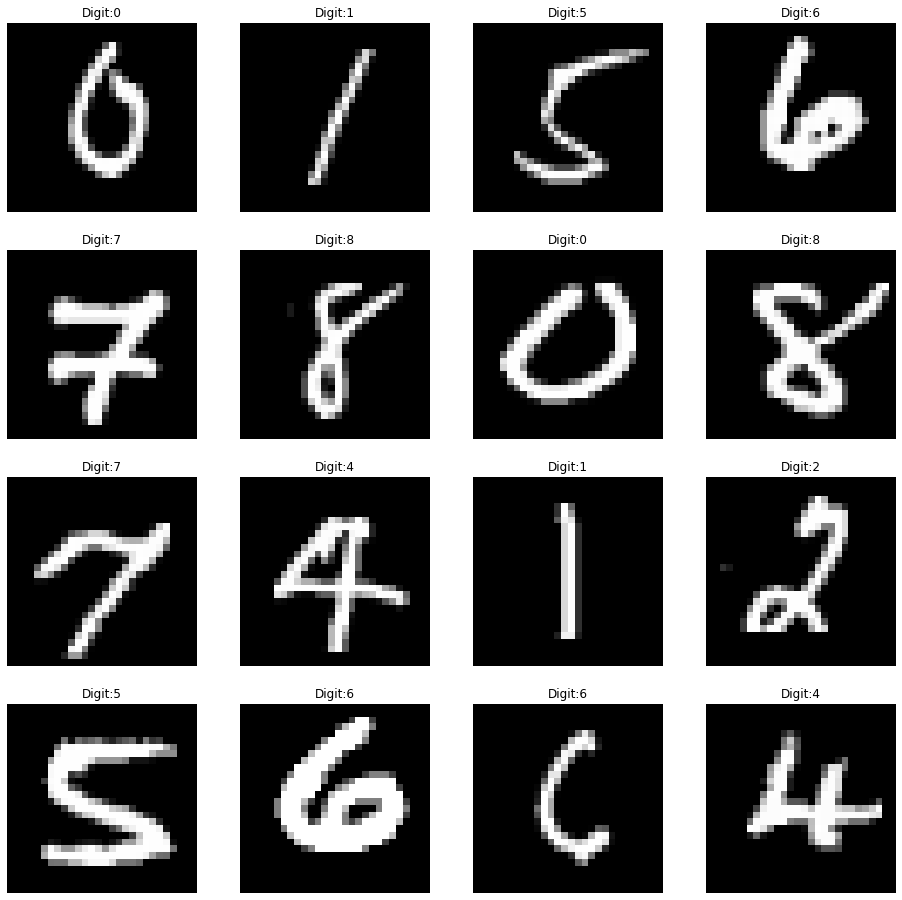

In [18]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i],cmap='gray')
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis('off')
  j +=1

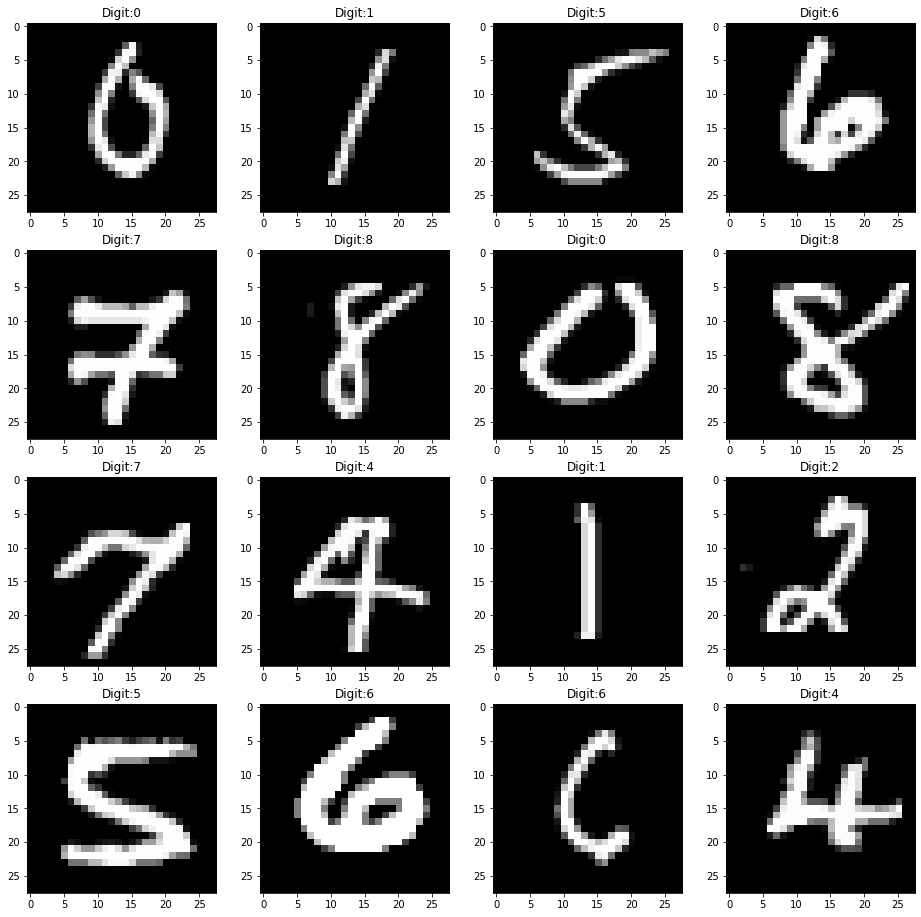

In [19]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i],cmap='gray')
  plt.title("Digit:"+str(train_labels[i]))
  #plt.axis('off')
  j +=1

In [20]:
train_digits_sc = train_digits/255.0
test_digits_sc = test_digits/255.0

In [21]:
from keras.utils import to_categorical

In [24]:
train_labels_cat = to_categorical(train_labels)

In [25]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [26]:
test_labels_cat = to_categorical(test_labels)
test_labels_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

###split the train data to train and validation

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)


In [29]:
# import the methods required
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [31]:
#we are creating the base model
model = Sequential()
#first layer we need to mention the input shape
model.add(Flatten(input_shape=(28,28)))
# 784 pixel values as input to this dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

###Compile the model
what is the loss function?

what is the optimizer?

what are the metrics?
